In [1]:
!pip install ultralytics roboflow opencv-python matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 M

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="pER3aqrQBR1p9puNyRNF")
project = rf.workspace("manoj-wcmgk").project("animals-dataset-icres")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Animals-Dataset-5 in yolov8:: 100%|██████████| 35946/35946 [00:04<00:00, 8361.73it/s] 


In [4]:
train_img_dir = os.path.join(dataset.location, "train", "images")
val_img_dir = os.path.join(dataset.location, "valid", "images")
test_img_dir = os.path.join(dataset.location, "test", "images")

train_images = os.listdir(train_img_dir)
val_images = os.listdir(val_img_dir)
test_images = os.listdir(test_img_dir)

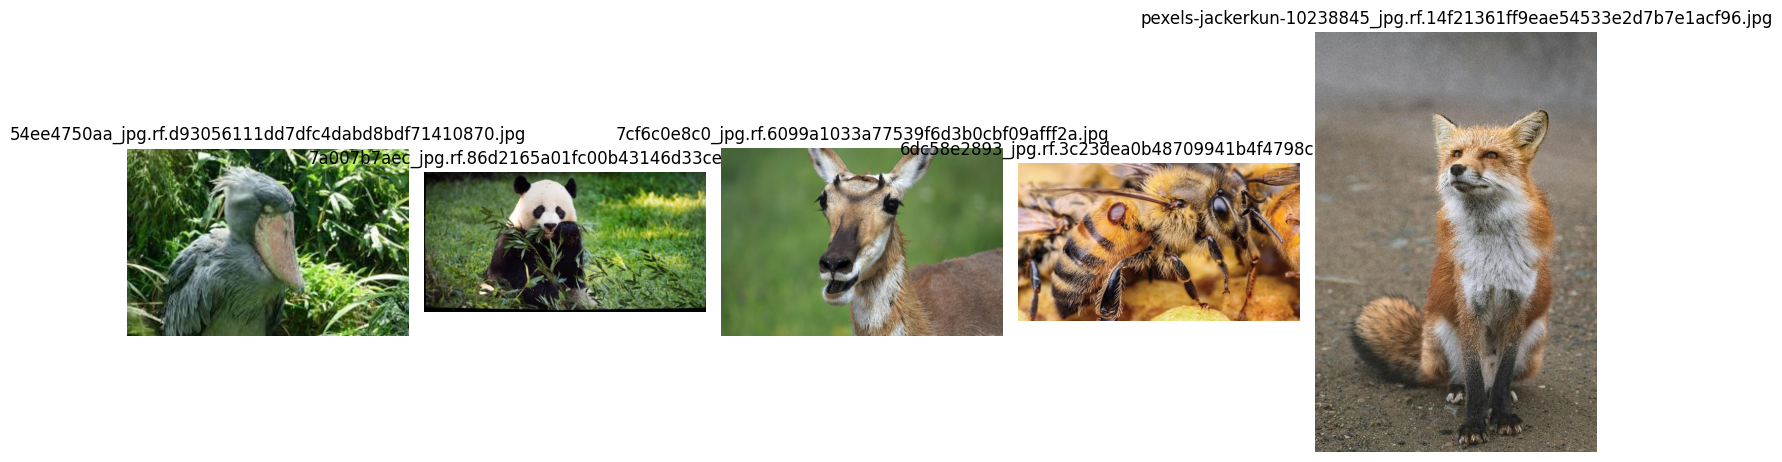

In [5]:
sample_imgs = random.sample(train_images, 5)

plt.figure(figsize=(15, 8))
for i, file in enumerate(sample_imgs):
    img_path = os.path.join(train_img_dir, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(file)
plt.tight_layout()
plt.show()

In [6]:
print(f"Train set images : {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Test set images  : {len(test_images)}")

Train set images : 16995
Validation images: 483
Test set images  : 489


In [7]:
model = YOLO("yolov8x.pt")

model.train(
    data=os.path.join(dataset.location, "data.yaml"),
    epochs=46,
    imgsz=512,
    batch=16,
    name="yolov8x_animals",
    patience=10,
    device=0,
    half=True,
    verbose=True,
    optimizer="SGD",
    lr0=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    cos_lr=True
)


100%|██████████| 131M/131M [00:00<00:00, 214MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/Animals-Dataset-5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=46, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8x_animals, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0, plots=True, pos

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=88

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1026.8±415.2 MB/s, size: 42.4 KB)


train: Scanning /kaggle/working/Animals-Dataset-5/train/labels... 16995 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16995/16995 [00:11<00:00, 1507.87it/s]


train: New cache created: /kaggle/working/Animals-Dataset-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 416.7±226.1 MB/s, size: 32.7 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/valid/labels... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<00:00, 1975.86it/s]

val: New cache created: /kaggle/working/Animals-Dataset-5/valid/labels.cache


Plotting labels to runs/detect/yolov8x_animals/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8x_animals
Starting training for 46 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/46      7.72G     0.9482      2.809      1.342         12        512: 100%|██████████| 1063/1063 [15:55<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        483        650      0.552      0.538      0.572      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/46      8.12G     0.9593      1.993      1.308         10        512: 100%|██████████| 1063/1063 [15:47<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.483      0.526      0.528      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/46      8.12G      1.082      2.227      1.379          7        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.483      0.365      0.393      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/46      8.14G      1.163       2.41      1.425          8        512: 100%|██████████| 1063/1063 [15:41<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.349      0.467      0.439      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/46      7.96G      1.113      2.129      1.379         11        512: 100%|██████████| 1063/1063 [15:41<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.568      0.474      0.524       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/46      8.15G      1.068      1.908      1.341         13        512: 100%|██████████| 1063/1063 [15:41<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.559      0.551      0.592      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/46      8.13G      1.028      1.729      1.316         15        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.575      0.598       0.63      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/46      8.15G     0.9946        1.6      1.287         11        512: 100%|██████████| 1063/1063 [15:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.602      0.629      0.681      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/46      7.95G     0.9649       1.48      1.268         13        512: 100%|██████████| 1063/1063 [15:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.747      0.617      0.711      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/46      8.15G     0.9295      1.367      1.246         10        512: 100%|██████████| 1063/1063 [15:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.675      0.636      0.729      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/46      8.16G     0.9091      1.288      1.228          9        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.799      0.644      0.763      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/46      8.14G     0.8945      1.216      1.215         11        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.678      0.685       0.75      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/46      7.95G     0.8752       1.16      1.201          9        512: 100%|██████████| 1063/1063 [15:46<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.747      0.715      0.788      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/46      8.15G     0.8559      1.099      1.194          6        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650       0.78      0.705      0.796      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/46      8.13G     0.8423      1.057      1.185         12        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.83it/s]

                   all        483        650      0.789      0.708      0.804      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/46      8.14G     0.8252      1.009      1.174         11        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.781      0.752      0.826      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/46      7.95G     0.8083      0.955      1.162          6        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.786      0.748      0.826      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/46      8.15G     0.7923     0.9123       1.15         15        512: 100%|██████████| 1063/1063 [15:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.822       0.74      0.829      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/46      8.13G     0.7811     0.8776      1.144         14        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650       0.86      0.749      0.852      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/46      8.14G     0.7671     0.8383      1.135         22        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.828      0.755      0.839      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/46      7.96G     0.7483      0.811      1.123          8        512: 100%|██████████| 1063/1063 [15:46<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650       0.84      0.753      0.854      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/46      8.15G     0.7325     0.7789       1.11          8        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.829      0.757      0.853      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/46      8.13G     0.7237     0.7526       1.11          7        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.844      0.747      0.842      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/46      8.14G     0.7063     0.7233        1.1          5        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650       0.86      0.763      0.855      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/46      7.96G      0.689     0.6911      1.088          8        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.841      0.778      0.867      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/46      8.17G     0.6764     0.6643      1.082         10        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.864      0.758      0.864      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/46      8.14G     0.6668     0.6428      1.078          5        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.865      0.773       0.86      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/46      8.16G     0.6562      0.622      1.071         10        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.871      0.769      0.869       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/46      7.96G     0.6437     0.6012      1.067          7        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        483        650      0.868      0.781      0.863      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/46      8.15G     0.6298     0.5795      1.059         13        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.891      0.769      0.865      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/46      8.13G     0.6144     0.5625      1.051         13        512: 100%|██████████| 1063/1063 [15:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.883      0.761      0.869      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/46      8.14G     0.6046     0.5366      1.043         11        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.868      0.763      0.871      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/46      8.13G     0.5914     0.5237      1.039         11        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.883      0.764      0.864      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/46      8.19G     0.5791     0.5094      1.033         15        512: 100%|██████████| 1063/1063 [15:43<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.894      0.752      0.868      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/46      8.14G     0.5669     0.4869      1.027          8        512: 100%|██████████| 1063/1063 [15:44<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.888      0.772      0.869      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/46      8.15G     0.5535     0.4771       1.02         14        512: 100%|██████████| 1063/1063 [15:45<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.867      0.774      0.864      0.726


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/46      7.96G     0.4066     0.2201     0.9139          4        512: 100%|██████████| 1063/1063 [15:39<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.879      0.774      0.869       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/46      8.15G       0.39     0.2078     0.9074          3        512: 100%|██████████| 1063/1063 [15:38<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]

                   all        483        650      0.882       0.77      0.863      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/46      8.15G     0.3764     0.1976     0.9007          3        512: 100%|██████████| 1063/1063 [15:37<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.888      0.757      0.861       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/46      8.15G     0.3658     0.1915     0.8944          4        512: 100%|██████████| 1063/1063 [15:38<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.84it/s]

                   all        483        650      0.864      0.776       0.86      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/46      8.14G      0.355     0.1856     0.8879          3        512: 100%|██████████| 1063/1063 [15:38<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650      0.872      0.772      0.862      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/46      8.15G     0.3463     0.1798     0.8833          5        512: 100%|██████████| 1063/1063 [15:39<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        483        650       0.87      0.771      0.864      0.727
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



42 epochs completed in 11.132 hours.
Optimizer stripped from runs/detect/yolov8x_animals/weights/last.pt, 136.9MB
Optimizer stripped from runs/detect/yolov8x_animals/weights/best.pt, 136.9MB

Validating runs/detect/yolov8x_animals/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,208,312 parameters, 0 gradients, 257.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]
invalid value encountered in less
invalid value encountered in less


                   all        483        650      0.868      0.762      0.868      0.728
              Antelope          5         10      0.938        0.6      0.683      0.603
                Badger          6          6      0.936      0.833      0.909      0.789
                   Bat          7          8      0.931       0.75      0.939      0.707
                  Bear          5          5      0.813      0.879      0.962      0.804
                   Bee          5          5          1      0.859      0.995      0.788
                Beetle          2          2          1      0.767      0.995      0.798
                 Bison         10         20          1      0.585      0.936      0.827
                  Boar          7          8      0.967       0.75      0.876      0.687
             Butterfly          9         10      0.987        0.8      0.888      0.774
                   Cat          6          6      0.818          1      0.995       0.88
           Caterpille

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4d9c0fcb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0

In [8]:
model = YOLO("/kaggle/working/runs/detect/yolov8x_animals/weights/best.pt")
results = model.val()
cm = results.confusion_matrix.matrix
labels = list(model.names.values())

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,208,312 parameters, 0 gradients, 257.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1085.7±187.9 MB/s, size: 27.8 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/valid/labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
invalid value encountered in less
invalid value encountered in less


                   all        483        650      0.866      0.759       0.87      0.732
              Antelope          5         10      0.941        0.6      0.679      0.588
                Badger          6          6      0.946      0.833      0.904      0.782
                   Bat          7          8      0.932       0.75      0.939      0.707
                  Bear          5          5      0.813      0.877      0.962      0.804
                   Bee          5          5          1      0.857      0.995      0.788
                Beetle          2          2          1      0.762      0.995      0.798
                 Bison         10         20          1       0.59      0.937      0.833
                  Boar          7          8       0.97       0.75      0.876      0.688
             Butterfly          9         10      0.987        0.8      0.879      0.763
                   Cat          6          6      0.827          1      0.995       0.88
           Caterpille

In [9]:
import pandas as pd
true_classes, pred_classes = [], []
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        n = int(cm[i, j])
        true_classes.extend([i] * n)
        pred_classes.extend([j] * n)

report_dict = classification_report(
    true_classes,
    pred_classes,
    zero_division=0,
    output_dict=True
)

overall_accuracy = report_dict["accuracy"]
macro_avg        = report_dict["macro avg"]
weighted_avg     = report_dict["weighted avg"]

summary_df = pd.DataFrame({
    "metric"       : ["precision", "recall", "f1-score", "accuracy"],
    "macro_avg"    : [macro_avg["precision"], macro_avg["recall"], macro_avg["f1-score"], overall_accuracy],
    "weighted_avg" : [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], overall_accuracy]
}).round(2)

print("\nOverall Classification Report (macro & weighted averages):\n")
print(summary_df.to_string(index=False))


Overall Classification Report (macro & weighted averages):

   metric  macro_avg  weighted_avg
precision       0.78          0.73
   recall       0.76          0.70
 f1-score       0.76          0.70
 accuracy       0.70          0.70


In [10]:
# Evaluate on validation set
val_results = model.val(data="/kaggle/working/Animals-Dataset-5/data.yaml", split='val')
print(f"\nValidation mAP50: {val_results.box.map50:.4f}")

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1286.3±572.4 MB/s, size: 37.1 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/valid/labels.cache... 483 images, 0 backgrounds, 0 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:19<00:00,  1.56it/s]
invalid value encountered in less
invalid value encountered in less


                   all        483        650      0.866      0.759       0.87      0.732
              Antelope          5         10      0.941        0.6      0.679      0.588
                Badger          6          6      0.946      0.833      0.904      0.782
                   Bat          7          8      0.932       0.75      0.939      0.707
                  Bear          5          5      0.813      0.877      0.962      0.804
                   Bee          5          5          1      0.857      0.995      0.788
                Beetle          2          2          1      0.762      0.995      0.798
                 Bison         10         20          1       0.59      0.937      0.833
                  Boar          7          8       0.97       0.75      0.876      0.688
             Butterfly          9         10      0.987        0.8      0.879      0.763
                   Cat          6          6      0.827          1      0.995       0.88
           Caterpille

In [11]:
# Evaluate on test set
test_results = model.val(data="/kaggle/working/Animals-Dataset-5/data.yaml", split='test')
print(f"\nTest mAP50: {test_results.box.map50:.4f}")

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1052.7±346.6 MB/s, size: 32.7 KB)


val: Scanning /kaggle/working/Animals-Dataset-5/test/labels... 489 images, 0 backgrounds, 0 corrupt: 100%|██████████| 489/489 [00:00<00:00, 1395.72it/s]

val: New cache created: /kaggle/working/Animals-Dataset-5/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:19<00:00,  1.60it/s]
invalid value encountered in less
invalid value encountered in less


                   all        489        644       0.85      0.836      0.898      0.754
              Antelope          9         13          1      0.729      0.796      0.635
                Badger          6          6      0.808          1      0.853      0.722
                   Bat          5          6       0.83          1      0.995       0.83
                  Bear          7          7          1      0.797      0.964      0.844
                   Bee          5          5      0.925          1      0.995      0.744
                Beetle          5          5          1      0.686      0.895      0.492
                 Bison          4          4          1      0.891      0.995      0.995
                  Boar          4          5       0.96          1      0.995      0.843
             Butterfly          5          5       0.82       0.92      0.895      0.797
                   Cat          5          5          1        0.9      0.995      0.863
           Caterpille

In [12]:
# Calculate overall accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 70.19%


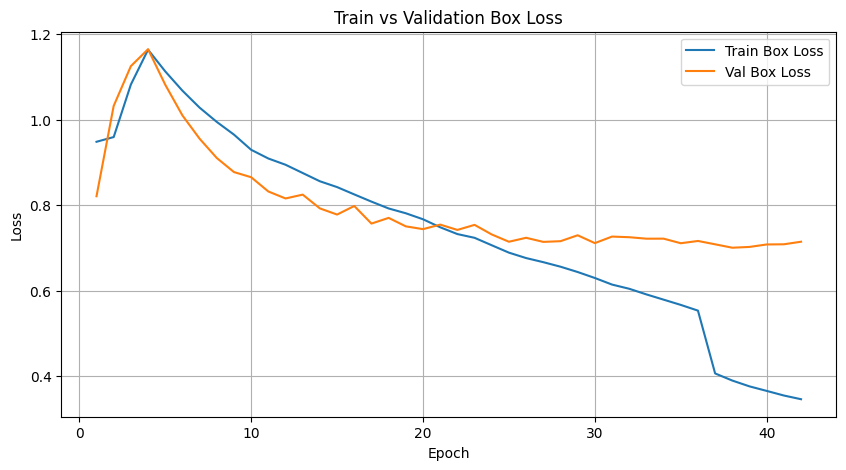

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training results
results_path = "/kaggle/working/runs/detect/yolov8x_animals/results.csv"
results_df = pd.read_csv(results_path)

# Plot Train vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss')
plt.title("Train vs Validation Box Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

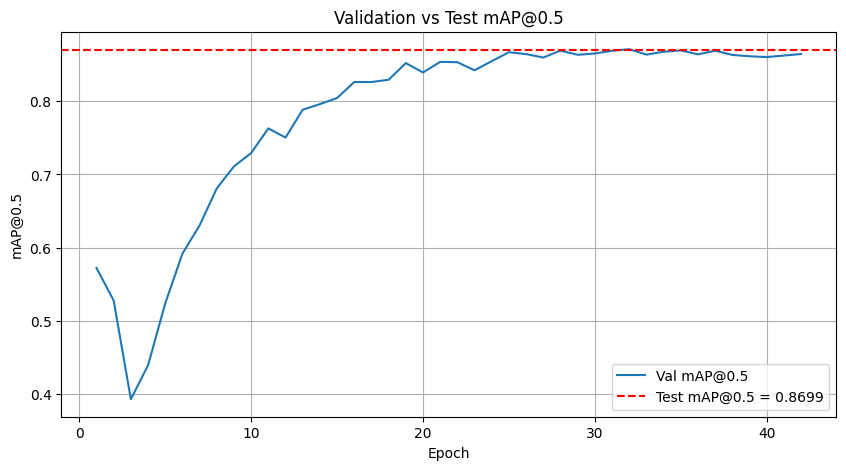

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='Val mAP@0.5')

# Add test mAP as horizontal line
plt.axhline(y=results.box.map50, color='r', linestyle='--', label=f'Test mAP@0.5 = {results.box.map50:.4f}')

plt.title("Validation vs Test mAP@0.5")
plt.xlabel("Epoch")
plt.ylabel("mAP@0.5")
plt.legend()
plt.grid(True)
plt.show()

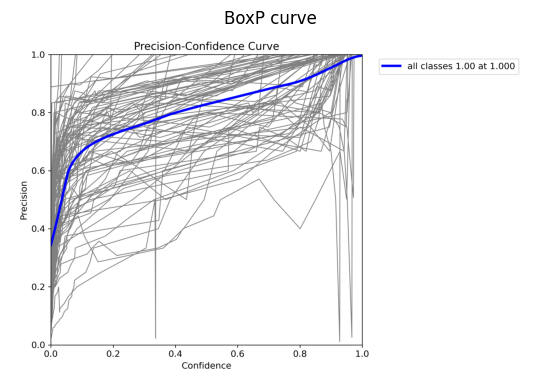

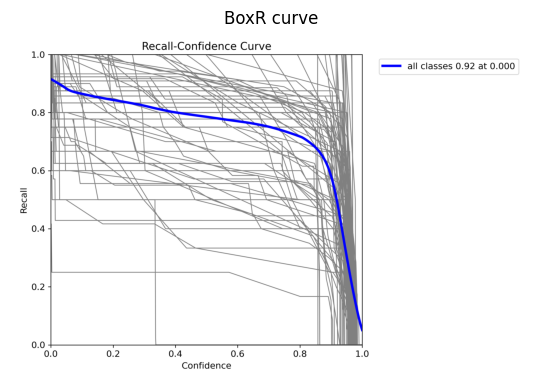

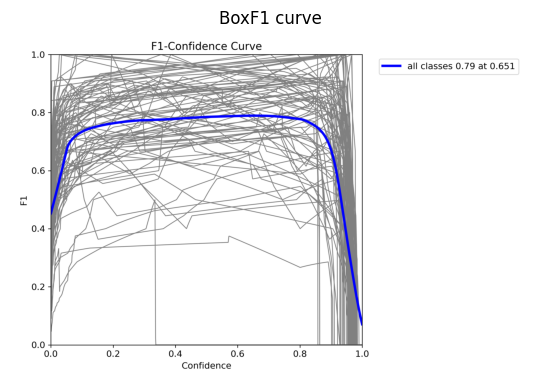

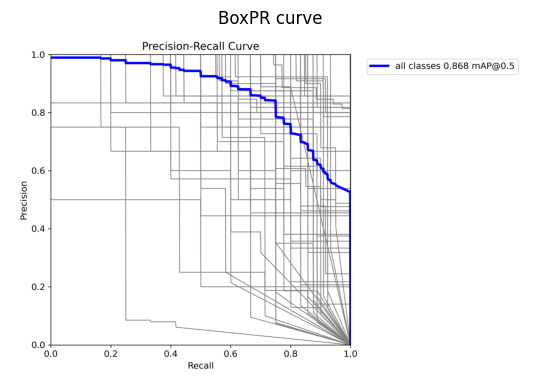

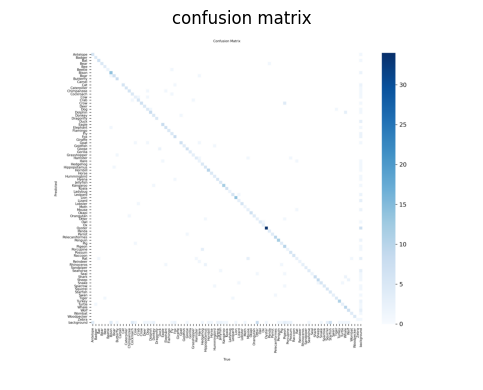

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

plot_dir = Path("/kaggle/working/runs/detect/yolov8x_animals")
figs = ["BoxP_curve.png", "BoxR_curve.png", "BoxF1_curve.png", "BoxPR_curve.png", "confusion_matrix.png"]

for f in figs:
    plt.figure(figsize=(6, 4))
    plt.imshow(mpimg.imread(plot_dir / f))
    plt.axis("off")
    plt.title(f.replace("_", " ").replace(".png", ""))
    plt.tight_layout()
    plt.show()


image 1/1 /kaggle/working/Animals-Dataset-5/test/images/3d3afbd78d_jpg.rf.750655cde674b91b279de85bb6652de6.jpg: 352x512 1 Hornbill, 51.8ms
Speed: 1.6ms preprocess, 51.8ms inference, 2.5ms postprocess per image at shape (1, 3, 352, 512)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/1e727a98f4_jpg.rf.aa94894a5e63d7f53427f93326b1e16b.jpg: 288x512 1 Bison, 43.7ms
Speed: 1.6ms preprocess, 43.7ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 512)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/9e81bc5555_jpg.rf.8a4c61e54d7da01e6249f202a304a1fd.jpg: 512x512 (no detections), 46.1ms
Speed: 1.6ms preprocess, 46.1ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /kaggle/working/Animals-Dataset-5/test/images/3ce594efc6_jpg.rf.0977bee8d166bf0796274ebee4bb5f35.jpg: 288x512 1 Boar, 35.3ms
Speed: 1.3ms preprocess, 35.3ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 512)

image 1/1 /kaggle/working/Animals-Dataset-5/test/imag

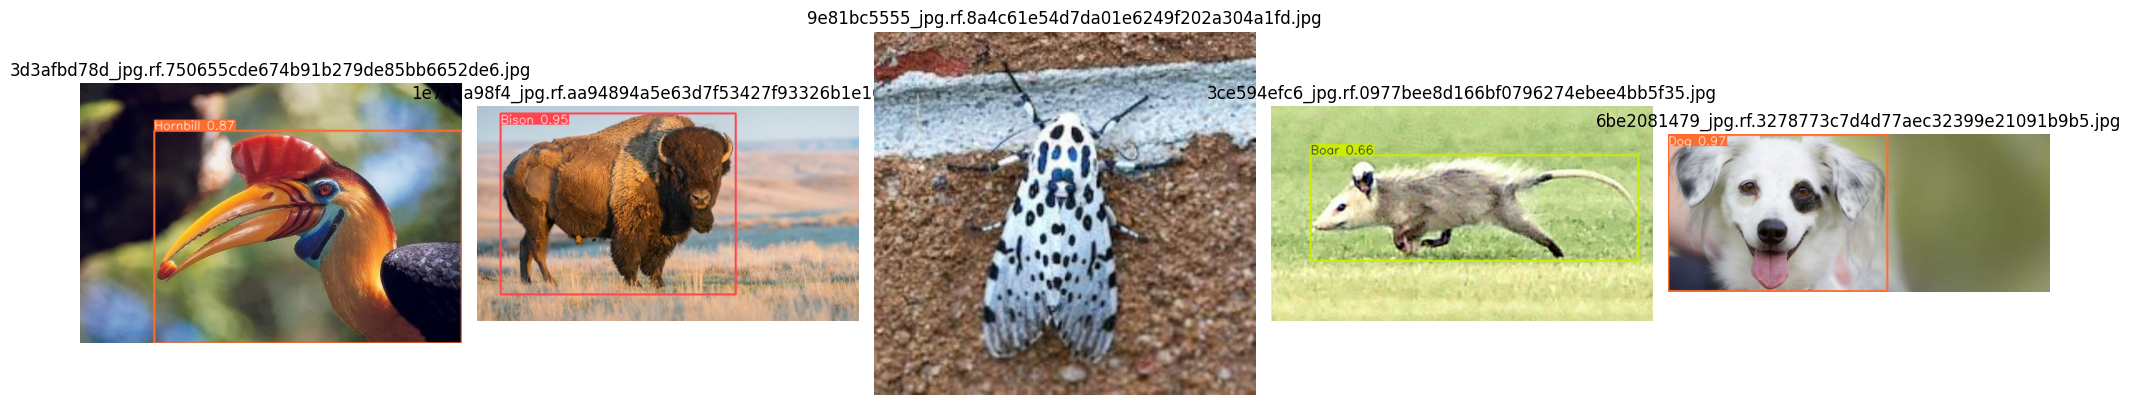

In [16]:
sample_test_imgs = random.sample(test_images, 5)

plt.figure(figsize=(20, 10))
for idx, img_file in enumerate(sample_test_imgs):
    img_path = os.path.join(test_img_dir, img_file)
    
    # Predict
    results = model(img_path)
    result_img = results[0].plot()
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, idx+1)
    plt.imshow(result_img)
    plt.axis('off')
    plt.title(img_file)

plt.tight_layout()
plt.show()